#**Predicting Breast Cancer in a patient**

##Abstract: 
#### --> Breast cancer represents one of the diseases that make a high number of deaths every year.
-->It is the most common type of all cancers and the main cause of women's deaths worldwide.
--> Classification and data mining methods are an effective way to classify data.
--> Especially in the medical field, where those methods are widely used in diagnosis and analysis to make decisions.

##**Problem Statement:**

--> Given the details of cell nuclei taken from breast mass, predict whether or not a patient has breast cancer using the Ensembling Techniques.
--> Perform necessary exploratory data analysis before building the model and evaluate the model based on performance metrics other than model accuracy.

###Dataset Information:
The dataset consists of several predictor variables and one target variable, Diagnosis.
The target variable has values 'Benign' and 'Malignant', where 'Benign' means that the cells are not harmful or there is no cancer and 'Malignant' means that the patient has cancer and the cells have a harmful effect

###Variable Description:

###Column Description

--> radius Mean of distances from center to points on the perimeter
--> texture Standard deviation of gray-scale values
--> perimeter Observed perimeter of the lump
--> area Observed area of lump
--> smoothness Local variation in radius lengths
--> compactness perimeter^2 / area - 1.0
--> concavity Severity of concave portions of the contour 
--> concave points number of concave portions of the contour
--> symmetry Lump symmetry
--> fractal dimension "coastline approximation" - 1
--> Diagnosis Whether the patient has cancer or not? ('Malignant','Benign')


The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

###Scope:

● Analysing the available data and exploring relationships among given variables

● Data Pre-processing

● Training SVM classifier to predict whether the patient has cancer or not

● Assess the correctness in classifying data with respect to efficiency and effectiveness of the SVM classifier in terms of accuracy, precision sensitivity, specificity and AUC ROC

● Tuning the hyperparameters of SVM Classifier provided by the scikit-learn library

#**Learning Outcome:**
The students will get a better understanding of how the variables are linked to each other and build an SVM model. Apart from various performance measures, they will also learn about hyperparameter tuning with cross-validation to improve these scores.

#Importing all required Library

In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

###Load Data

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/JOHANDILEEP21/Mini-Projects/main/cancer.csv', index_col=False)
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [81]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In here, The unnamed: 32 column has a large amount of null values. Id is not the major features as working with this data. So we should drop the column.

In [82]:
df = df.drop(['Unnamed: 32', 'id'], axis=1)

After removed the column. Check the shape of the DataFrame.

In [83]:
df.shape

(569, 31)

In [84]:
df = df.drop_duplicates()

In [85]:
df.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [86]:
df.shape

(569, 31)

###Converting the Diagnosis column string into binarical representaion

First thing to do is to enumerate the diagnosis column such that M = 1, B = 0. 


In [87]:
df['diagnosis'] = df['diagnosis'].apply(lambda x:'1' if x == 'M' else '0')

Let's take a look at the number of Benign and Maglinant cases from the dataset. 

From the output shown below, majority of the cases are benign (0).

In [88]:
print(df.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


### Working with the outliers

In [89]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
((df < (q1 - 1.5 * iqr))|(df > (q3 +1.5*iqr))).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  after removing the cwd from sys.path.


area_mean                  25
area_se                    65
area_worst                 35
compactness_mean           16
compactness_se             28
compactness_worst          16
concave points_mean        10
concave points_se          19
concave points_worst        0
concavity_mean             18
concavity_se               22
concavity_worst            12
diagnosis                   0
fractal_dimension_mean     15
fractal_dimension_se       28
fractal_dimension_worst    24
perimeter_mean             13
perimeter_se               38
perimeter_worst            15
radius_mean                14
radius_se                  38
radius_worst               17
smoothness_mean             6
smoothness_se              30
smoothness_worst            7
symmetry_mean              15
symmetry_se                27
symmetry_worst             23
texture_mean                7
texture_se                 20
texture_worst               5
dtype: int64

Next, we visualise the data using density plots to get a sense of the data distribution.

From the outputs below, you can see the data shows a general gaussian distribution.

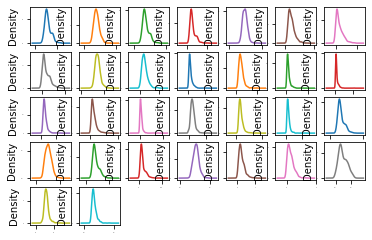

In [90]:
df.plot(kind='density', subplots=True, layout=(5,7),sharex=False,legend=False, fontsize=1)
plt.show()

It is good to check the correlations between the attributes.

From the output graph below, The red around the diagonal suggests that attributes are correlated with each other.

The yellow and green patches suggest some moderate correlation and the blue boxes show negative correlations.

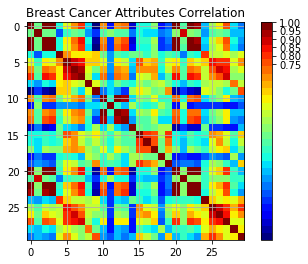

In [91]:
from matplotlib import cm
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation='none', cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
#Add colorbar, make sure to specify the tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.9,.95,1])
plt.show()

Finally, we'll split the data into predictor variables and target variable, following by breaking them into train and test sets.

We will use 30% of the data as test set.

In [110]:
X = df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [112]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [113]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [114]:
def capping(df,cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Up=Q3 + (1.5 * IQR)
        Low=Q1 - (1.5 * IQR)
        
        df[col]=np.where(df[col]> Up,Up,np.where(df[col]<Low,Low,df[col]))

In [115]:
cols = X_train.columns

In [116]:
cols

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [117]:
capping(X_train, cols)

In [118]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.042167,19.102619,91.486379,635.864730,0.097624,0.105889,0.088817,0.049241,0.182774,0.063268,...,16.188746,25.481241,106.894878,844.154271,0.134261,0.258801,0.277530,0.117471,0.290402,0.084742
std,3.344909,4.086274,23.114076,302.060807,0.013709,0.050274,0.074972,0.037706,0.027097,0.006675,...,4.565539,5.888536,32.102713,461.465541,0.021962,0.148765,0.202188,0.067101,0.055857,0.016487
min,7.691000,9.710000,47.980000,170.400000,0.062510,0.019380,0.000000,0.000000,0.109750,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.710000,16.172500,75.222500,420.300000,0.087720,0.067015,0.031503,0.020795,0.162250,0.058720,...,13.010000,21.042500,84.572500,514.325000,0.120625,0.149100,0.121400,0.065330,0.251500,0.072790
50%,13.390000,18.635000,86.290000,552.050000,0.096865,0.097635,0.061680,0.034605,0.181150,0.062230,...,14.975000,25.180000,98.115000,688.750000,0.132950,0.223950,0.231400,0.102300,0.281850,0.081490
75%,15.745000,21.585000,103.700000,771.775000,0.106450,0.131675,0.132250,0.070582,0.197250,0.066947,...,18.540000,29.390000,124.825000,1041.750000,0.147800,0.350775,0.396075,0.166200,0.321375,0.093520
max,21.797500,29.703750,146.416250,1298.987500,0.134545,0.228665,0.283371,0.145264,0.249750,0.079289,...,26.835000,41.911250,185.203750,1832.887500,0.188562,0.653288,0.808088,0.291000,0.426187,0.124615


In [121]:
q1 = X_train.quantile(0.25)
q3 = X_train.quantile(0.75)
iqr = q3 - q1
((X_train < (q1 - 1.5 * iqr))|(X_train > (q3 +1.5*iqr))).sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

###Scaling the data

In [123]:
scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Baseline Algorithm Checking

---

From the dataset, we will analysis and build a model to predict if a given set of symptoms lead to breast cancer.

This is a binary classification problem, and a few algorithms are appropriate for use.

Since we do not know which one will perform the best at the point, we will do a quick test on the few appropriate algorithms with default setting to get an early indication of how each of them perform.

We will use 10 fold cross validation for each testing.

---



The following non-linear algorithms will be used, namely:

**Classification and Regression Trees (CART)**

**Linear Support Vector Machines (SVM)**

**Gaussian Naive Bayes (NB)**

**k-Nearest Neighbors (KNN).**

In [124]:
models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('GAUSSIAN NAIVE BAYES', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

In [125]:
num_folds = 10
results = []
names =[]
for name, model in models_list:
  kfold = KFold(n_splits=num_folds, shuffle=True)
  start = time.time()
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold)
  end = time.time()
  results.append(cv_results)
  names.append(name)
  print("%s: %f (%f) (runtime: %f)" % (name, cv_results.mean(), cv_results.std(),end-start))

CART: 0.924487 (0.033937) (runtime: 0.077198)
SVM: 0.969872 (0.026903) (runtime: 0.059020)
GAUSSIAN NAIVE BAYES: 0.934487 (0.036310) (runtime: 0.031228)
KNN: 0.964872 (0.032078) (runtime: 0.058627)


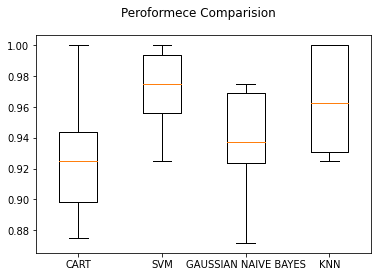

In [126]:
fig = plt.figure()
fig.suptitle('Peroformece Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From the initial run, it looks like few performed the best given the dataset (all above 92% mean accuracy).

Support Vector Machine has a surprisingly bad performance here.

However, if we standardise the input dataset, it's performance should improve.

##Evaluation of algorithm on Standardised Data

---


The performance of the few machine learning algorithm could be improved if a standardised dataset is being used.

The improvement is likely for all the models.

I will use pipelines that standardize the data and build the model for each fold in the cross-validation test harness.

That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

In [127]:
import warnings

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',KNeighborsClassifier())])))

results = []
names = []
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, shuffle=True)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))

ScaledCART: 0.919808 (0.052062) (run time: 0.086803)
ScaledSVM: 0.982372 (0.025164) (run time: 0.069010)
ScaledNB: 0.934744 (0.042120) (run time: 0.034734)
ScaledKNN: 0.967308 (0.022582) (run time: 0.092608)


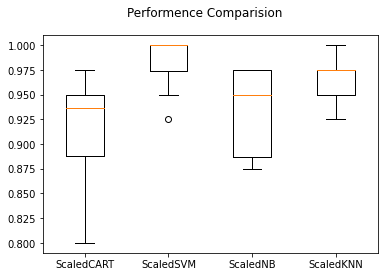

In [128]:
fig = plt.figure()
fig.suptitle('Performence Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Notice the drastic improvement of SVM after using scaled data.

Next, we'll fine tune the performance of SVM by tuning the algorithm

##Algorithm Tuning - Tuning SVM

---


We will focus on SVM for the algorithm tuning. We can tune two key parameter of the SVM algorithm - the value of C and the type of kernel.

The default C for SVM is 1.0 and the kernel is Radial Basis Function (RBF).

We will use the grid search method using 10-fold cross-validation with a standardized copy of the sample training dataset. We will try over a combination of C values and the following kernel types 'linear', 'poly', 'rbf' and 'sigmoid

In [129]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.979872 using {'C': 0.9, 'kernel': 'rbf'}
0.964808 (0.028120) with: {'C': 0.1, 'kernel': 'linear'}
0.839231 (0.058254) with: {'C': 0.1, 'kernel': 'poly'}
0.947179 (0.032630) with: {'C': 0.1, 'kernel': 'rbf'}
0.942244 (0.029625) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.962308 (0.037696) with: {'C': 0.3, 'kernel': 'linear'}
0.864359 (0.040482) with: {'C': 0.3, 'kernel': 'poly'}
0.962308 (0.032141) with: {'C': 0.3, 'kernel': 'rbf'}
0.962308 (0.027983) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.952244 (0.041337) with: {'C': 0.5, 'kernel': 'linear'}
0.876987 (0.037626) with: {'C': 0.5, 'kernel': 'poly'}
0.972372 (0.023573) with: {'C': 0.5, 'kernel': 'rbf'}
0.964808 (0.033952) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.954744 (0.043345) with: {'C': 0.7, 'kernel': 'linear'}
0.889551 (0.035458) with: {'C': 0.7, 'kernel': 'poly'}
0.977372 (0.020784) with: {'C': 0.7, 'kernel': 'rbf'}
0.967308 (0.027567) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.959744 (0.039451) with: {'C': 0.9, 'kernel': 'linear'

We can see the most accurate configuration was SVM with an RBF kernel and C=1.3, with the high accuracy.

###Application of SVC on dataset

Let's fit the SVM to the dataset and see how it performs given the test data.

In [130]:
# prepare the model
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
model = SVC(C=2.0, kernel='rbf')
start = time.time()
model.fit(X_train_scaled, y_train)
end = time.time()
print( "Run Time: %f" % (end-start))

Run Time: 0.006531


In [131]:
# estimate accuracy on test dataset
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    X_test_scaled = scaler.transform(X_test)
predictions = model.predict(X_test_scaled)

In [132]:
print("Accuracy score %f" % accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy score 0.976608
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



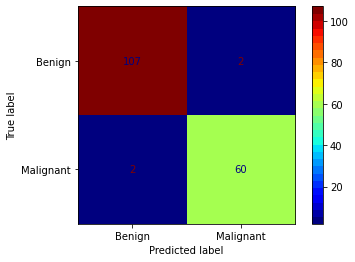

In [135]:
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

In [136]:
print(confusion_matrix(y_test, predictions))

[[107   2]
 [  2  60]]


We can see that we achieve a high accuracy on the held-out test dataset. 

From the confusion matrix, there is only 1 case of mis-classification.

The performance of this algorithm is expected to be high given the symptoms for breast cancer should exchibit certain clear patterns.

#**What else could be done**

---


--> 1) Test the algorithm on KNN and GausianNB

--> 2) Test the data with Artificial Neural Net